In [22]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [23]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Kavaratti,IN,2019-11-05 23:07:52,10.57,72.64,80.92,82,21,13.24
1,1,Nicoya,CR,2019-11-05 23:07:52,10.15,-85.45,87.80,55,20,13.87
2,2,Busselton,AU,2019-11-05 23:03:10,-33.64,115.35,54.00,66,45,5.14
3,3,Provideniya,RU,2019-11-05 23:07:52,64.42,-173.23,26.60,79,40,6.71
4,4,Saint-Leu,RE,2019-11-05 23:07:52,-21.15,55.28,73.40,60,88,6.93


In [24]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [25]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

Figure(layout=FigureLayout(height='420px'))

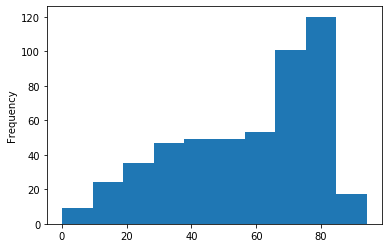

In [26]:
city_data_df_gte_0_temp_df = city_data_df[city_data_df['Max Temp'] >= 0]
city_data_df_gte_0_temp_df['Max Temp'].plot(kind='hist')

# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df_gte_0_temp_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df_gte_0_temp_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, 
                                 dissipating=False,
                                 point_radius=3,
                                max_intensity=300)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

In [27]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [28]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
# Heatmap of wind speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [30]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [31]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Kavaratti,IN,2019-11-05 23:07:52,10.57,72.64,80.92,82,21,13.24
1,1,Nicoya,CR,2019-11-05 23:07:52,10.15,-85.45,87.80,55,20,13.87
9,9,Nioro,GM,2019-11-05 23:07:53,13.79,-15.05,86.81,35,69,8.52
18,18,Hilo,US,2019-11-05 23:05:09,19.71,-155.08,84.20,66,40,9.17
22,22,Rikitea,PF,2019-11-05 23:05:10,-23.12,-134.97,77.40,80,15,5.01
25,25,Victoria Point,AU,2019-11-05 23:05:10,-27.58,153.30,78.01,30,0,10.29
27,27,Abu Dhabi,AE,2019-11-05 23:02:03,24.47,54.37,82.40,69,0,2.24
31,31,Kahului,US,2019-11-05 23:05:12,20.89,-156.47,86.00,58,40,5.82
33,33,Bluff,AU,2019-11-05 23:05:12,-23.58,149.07,75.72,18,24,11.70
39,39,Kirakira,SB,2019-11-05 23:05:13,-10.46,161.92,83.70,66,69,5.30


In [32]:
# Check for null values
preferred_cities_df.count()

City_ID       147
City          147
Country       146
Date          147
Lat           147
Lng           147
Max Temp      147
Humidity      147
Cloudiness    147
Wind Speed    147
dtype: int64

In [33]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Kavaratti,IN,80.92,10.57,72.64,
1,Nicoya,CR,87.80,10.15,-85.45,
9,Nioro,GM,86.81,13.79,-15.05,
18,Hilo,US,84.20,19.71,-155.08,
22,Rikitea,PF,77.40,-23.12,-134.97,
...,...,...,...,...,...,...
500,Namatanai,PG,82.81,-3.66,152.44,
506,Kununurra,AU,84.20,-15.77,128.74,
511,Innisfail,AU,82.00,-17.52,146.03,
513,Edgewater,US,81.00,28.99,-80.90,


In [34]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to the params dictionary as values to the location key.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    
   # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [37]:
hotel_df

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Kavaratti,IN,80.92,10.57,72.64,Hotels in Lakshadweep Islands
1,Nicoya,CR,87.80,10.15,-85.45,Las Aguilas
9,Nioro,GM,86.81,13.79,-15.05,
18,Hilo,US,84.20,19.71,-155.08,Hilo Seaside Hotel
22,Rikitea,PF,77.40,-23.12,-134.97,Pension Maro'i
...,...,...,...,...,...,...
500,Namatanai,PG,82.81,-3.66,152.44,Namatanai Hotel
506,Kununurra,AU,84.20,-15.77,128.74,Hotel Kununurra
511,Innisfail,AU,82.00,-17.52,146.03,Moondarra Motel
513,Edgewater,US,81.00,28.99,-80.90,Islander Beach Resort


In [40]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))